In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                           roc_curve, precision_recall_curve, accuracy_score)
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Set random seed for reproducibility
np.random.seed(42)

class ImprovedLogisticRegression:
    """
    Enhanced Logistic Regression implementation with professional features
    """
    
    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-6, 
                 regularization=None, lambda_reg=0.01, verbose=True):
        """
        Initialize the Logistic Regression model
        
        Parameters:
        -----------
        learning_rate : float, default=0.01
            Learning rate for gradient descent
        max_iterations : int, default=1000
            Maximum number of iterations for convergence
        tolerance : float, default=1e-6
            Convergence tolerance
        regularization : str, default=None
            Type of regularization ('l1', 'l2', or None)
        lambda_reg : float, default=0.01
            Regularization strength
        verbose : bool, default=True
            Whether to print training progress
        """
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.regularization = regularization
        self.lambda_reg = lambda_reg
        self.verbose = verbose
        
        # Training history
        self.cost_history = []
        self.accuracy_history = []
        self.convergence_iteration = None
        
    def _sigmoid(self, z):
        """
        Stable sigmoid function to prevent overflow
        """
        # Clip z to prevent overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def _compute_cost(self, y_true, y_pred):
        """
        Compute logistic regression cost with optional regularization
        """
        # Prevent log(0) by clipping predictions
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        
        # Binary cross-entropy loss
        cost = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        
        # Add regularization
        if self.regularization == 'l1':
            cost += self.lambda_reg * np.sum(np.abs(self.weights))
        elif self.regularization == 'l2':
            cost += self.lambda_reg * np.sum(self.weights ** 2)
            
        return cost
    
    def fit(self, X, y):
        """
        Train the logistic regression model
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array-like, shape (n_samples,)
            Target values
        """
        # Initialize parameters
        self.n_samples, self.n_features = X.shape
        self.weights = np.random.normal(0, 0.01, self.n_features)
        self.bias = 0
        
        # Store training data for potential use
        self.X_train = X
        self.y_train = y
        
        prev_cost = float('inf')
        
        for i in range(self.max_iterations):
            # Forward pass
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(linear_pred)
            
            # Compute cost
            cost = self._compute_cost(y, predictions)
            self.cost_history.append(cost)
            
            # Compute accuracy
            binary_pred = (predictions >= 0.5).astype(int)
            accuracy = np.mean(binary_pred == y) * 100
            self.accuracy_history.append(accuracy)
            
            # Compute gradients
            dw = np.dot(X.T, (predictions - y)) / self.n_samples
            db = np.mean(predictions - y)
            
            # Add regularization to gradients
            if self.regularization == 'l1':
                dw += self.lambda_reg * np.sign(self.weights)
            elif self.regularization == 'l2':
                dw += 2 * self.lambda_reg * self.weights
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Check for convergence
            if abs(prev_cost - cost) < self.tolerance:
                self.convergence_iteration = i
                if self.verbose:
                    print(f"Converged at iteration {i}")
                break
                
            prev_cost = cost
            
            # Print progress
            if self.verbose and (i + 1) % 1000 == 0:
                print(f"Iteration {i+1}/{self.max_iterations}, Cost: {cost:.6f}, Accuracy: {accuracy:.2f}%")
        
        if self.verbose:
            final_accuracy = self.accuracy_history[-1]
            print(f"Training completed. Final accuracy: {final_accuracy:.2f}%")
    
    def predict_proba(self, X):
        """
        Predict class probabilities
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Test data
            
        Returns:
        --------
        probabilities : array-like, shape (n_samples,)
            Predicted probabilities
        """
        linear_pred = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_pred)
    
    def predict(self, X, threshold=0.5):
        """
        Make binary predictions
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Test data
        threshold : float, default=0.5
            Decision threshold
            
        Returns:
        --------
        predictions : array-like, shape (n_samples,)
            Binary predictions
        """
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)
    
    def score(self, X, y):
        """
        Calculate accuracy score
        """
        predictions = self.predict(X)
        return np.mean(predictions == y)
    
    def plot_training_history(self):
        """
        Plot training cost and accuracy history
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot cost history
        ax1.plot(self.cost_history, color='red', linewidth=2)
        ax1.set_title('Training Cost History', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Cost')
        ax1.grid(True, alpha=0.3)
        
        # Plot accuracy history
        ax2.plot(self.accuracy_history, color='blue', linewidth=2)
        ax2.set_title('Training Accuracy History', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Accuracy (%)')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

class HeartDiseasePredictor:
    """
    Complete heart disease prediction pipeline
    """
    
    def __init__(self, model_params=None):
        """
        Initialize the heart disease predictor
        """
        self.model_params = model_params or {
            'learning_rate': 0.01,
            'max_iterations': 2000,
            'regularization': 'l2',
            'lambda_reg': 0.01
        }
        self.model = None
        self.scaler = StandardScaler()
        self.imputer = SimpleImputer(strategy='median')
        self.feature_names = None
        
    def load_and_preprocess_data(self, file_path):
        """
        Load and preprocess the Framingham dataset
        """
        try:
            # Load data
            df = pd.read_csv(file_path)
            print(f"Dataset loaded: {df.shape[0]} samples, {df.shape[1]} features")
            print(f"Missing values per column:")
            missing_info = df.isnull().sum()
            print(missing_info[missing_info > 0])
            
            # Store feature names
            self.feature_names = df.columns[:-1].tolist()
            
            # Separate features and target
            X = df.iloc[:, :-1].values
            y = df.iloc[:, -1].values
            
            # Handle missing values
            X = self.imputer.fit_transform(X)
            
            # Remove any remaining NaN values in target
            valid_indices = ~np.isnan(y)
            X = X[valid_indices]
            y = y[valid_indices]
            
            print(f"After preprocessing: {X.shape[0]} samples, {X.shape[1]} features")
            print(f"Class distribution: {np.bincount(y.astype(int))}")
            
            return X, y
            
        except Exception as e:
            print(f"Error loading data: {e}")
            return None, None
    
    def train_model(self, X, y, test_size=0.2, validation_split=0.2):
        """
        Train the model with proper train/validation/test splits
        """
        # First split: separate test set
        X_temp, X_test, y_temp, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )
        
        # Second split: separate train and validation
        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=validation_split, random_state=42, stratify=y_temp
        )
        
        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_val_scaled = self.scaler.transform(X_val)
        X_test_scaled = self.scaler.transform(X_test)
        
        print(f"Training set: {X_train_scaled.shape[0]} samples")
        print(f"Validation set: {X_val_scaled.shape[0]} samples")
        print(f"Test set: {X_test_scaled.shape[0]} samples")
        
        # Train model
        self.model = ImprovedLogisticRegression(**self.model_params)
        self.model.fit(X_train_scaled, y_train)
        
        # Store datasets for evaluation
        self.X_train, self.y_train = X_train_scaled, y_train
        self.X_val, self.y_val = X_val_scaled, y_val
        self.X_test, self.y_test = X_test_scaled, y_test
        
        return self.model
    
    def evaluate_model(self):
        """
        Comprehensive model evaluation
        """
        if self.model is None:
            print("Model not trained yet!")
            return
        
        # Predictions for all sets
        train_pred = self.model.predict(self.X_train)
        val_pred = self.model.predict(self.X_val)
        test_pred = self.model.predict(self.X_test)
        
        train_proba = self.model.predict_proba(self.X_train)
        val_proba = self.model.predict_proba(self.X_val)
        test_proba = self.model.predict_proba(self.X_test)
        
        # Calculate metrics
        train_acc = accuracy_score(self.y_train, train_pred) * 100
        val_acc = accuracy_score(self.y_val, val_pred) * 100
        test_acc = accuracy_score(self.y_test, test_pred) * 100
        
        train_auc = roc_auc_score(self.y_train, train_proba)
        val_auc = roc_auc_score(self.y_val, val_proba)
        test_auc = roc_auc_score(self.y_test, test_proba)
        
        print("=== Model Performance ===")
        print(f"Training Accuracy: {train_acc:.2f}%")
        print(f"Validation Accuracy: {val_acc:.2f}%")
        print(f"Test Accuracy: {test_acc:.2f}%")
        print(f"Training AUC: {train_auc:.4f}")
        print(f"Validation AUC: {val_auc:.4f}")
        print(f"Test AUC: {test_auc:.4f}")
        
        # Classification report for test set
        print("\n=== Test Set Classification Report ===")
        print(classification_report(self.y_test, test_pred, 
                                  target_names=['No Heart Disease', 'Heart Disease']))
        
        return {
            'train_acc': train_acc, 'val_acc': val_acc, 'test_acc': test_acc,
            'train_auc': train_auc, 'val_auc': val_auc, 'test_auc': test_auc
        }
    
    def plot_evaluation_metrics(self):
        """
        Plot comprehensive evaluation metrics
        """
        if self.model is None:
            return
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. Training history
        axes[0, 0].plot(self.model.cost_history, color='red', linewidth=2)
        axes[0, 0].set_title('Cost History', fontweight='bold')
        axes[0, 0].set_xlabel('Iteration')
        axes[0, 0].set_ylabel('Cost')
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. ROC Curves
        train_proba = self.model.predict_proba(self.X_train)
        val_proba = self.model.predict_proba(self.X_val)
        test_proba = self.model.predict_proba(self.X_test)
        
        # Calculate ROC curves
        train_fpr, train_tpr, _ = roc_curve(self.y_train, train_proba)
        val_fpr, val_tpr, _ = roc_curve(self.y_val, val_proba)
        test_fpr, test_tpr, _ = roc_curve(self.y_test, test_proba)
        
        axes[0, 1].plot(train_fpr, train_tpr, label=f'Train (AUC = {roc_auc_score(self.y_train, train_proba):.3f})')
        axes[0, 1].plot(val_fpr, val_tpr, label=f'Val (AUC = {roc_auc_score(self.y_val, val_proba):.3f})')
        axes[0, 1].plot(test_fpr, test_tpr, label=f'Test (AUC = {roc_auc_score(self.y_test, test_proba):.3f})')
        axes[0, 1].plot([0, 1], [0, 1], 'k--', alpha=0.5)
        axes[0, 1].set_title('ROC Curves', fontweight='bold')
        axes[0, 1].set_xlabel('False Positive Rate')
        axes[0, 1].set_ylabel('True Positive Rate')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Confusion Matrix
        test_pred = self.model.predict(self.X_test)
        cm = confusion_matrix(self.y_test, test_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
                   xticklabels=['No Disease', 'Disease'],
                   yticklabels=['No Disease', 'Disease'])
        axes[1, 0].set_title('Confusion Matrix (Test Set)', fontweight='bold')
        axes[1, 0].set_ylabel('True Label')
        axes[1, 0].set_xlabel('Predicted Label')
        
        # 4. Feature Importance (weights)
        if self.feature_names and len(self.feature_names) == len(self.model.weights):
            feature_importance = np.abs(self.model.weights)
            sorted_idx = np.argsort(feature_importance)[::-1][:10]  # Top 10 features
            
            axes[1, 1].barh(range(len(sorted_idx)), 
                           feature_importance[sorted_idx])
            axes[1, 1].set_yticks(range(len(sorted_idx)))
            axes[1, 1].set_yticklabels([self.feature_names[i] for i in sorted_idx])
            axes[1, 1].set_title('Top 10 Feature Importance', fontweight='bold')
            axes[1, 1].set_xlabel('|Weight|')
        
        plt.tight_layout()
        plt.show()
    
    def cross_validate(self, X, y, cv_folds=5):
        """
        Perform cross-validation
        """
        # Scale features
        X_scaled = self.scaler.fit_transform(X)
        
        # Cross-validation
        skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
        cv_scores = []
        
        for fold, (train_idx, val_idx) in enumerate(skf.split(X_scaled, y)):
            X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
            y_train_fold, y_val_fold = y[train_idx], y[val_idx]
            
            # Train model for this fold
            fold_model = ImprovedLogisticRegression(**self.model_params, verbose=False)
            fold_model.fit(X_train_fold, y_train_fold)
            
            # Evaluate
            fold_score = fold_model.score(X_val_fold, y_val_fold)
            cv_scores.append(fold_score)
            
            print(f"Fold {fold + 1}: {fold_score:.4f}")
        
        print(f"\nCross-validation results:")
        print(f"Mean accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")
        
        return cv_scores

=== Enhanced Heart Disease Prediction ===
Dataset loaded: 4238 samples, 16 features
Missing values per column:
education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64
After preprocessing: 4238 samples, 15 features
Class distribution: [3594  644]

=== Cross-Validation ===
Fold 1: 0.8479
Fold 2: 0.8491
Fold 3: 0.8479
Fold 4: 0.8560
Fold 5: 0.8548

Cross-validation results:
Mean accuracy: 0.8511 (+/- 0.0071)

=== Training Final Model ===
Training set: 2712 samples
Validation set: 678 samples
Test set: 848 samples
Iteration 1000/2000, Cost: 0.394708, Accuracy: 85.44%
Iteration 2000/2000, Cost: 0.381964, Accuracy: 85.58%
Training completed. Final accuracy: 85.58%

=== Model Evaluation ===
=== Model Performance ===
Training Accuracy: 85.58%
Validation Accuracy: 85.40%
Test Accuracy: 84.79%
Training AUC: 0.7382
Validation AUC: 0.7392
Test AUC: 0.6987

=== Test Set Classification Report ===
                  pre

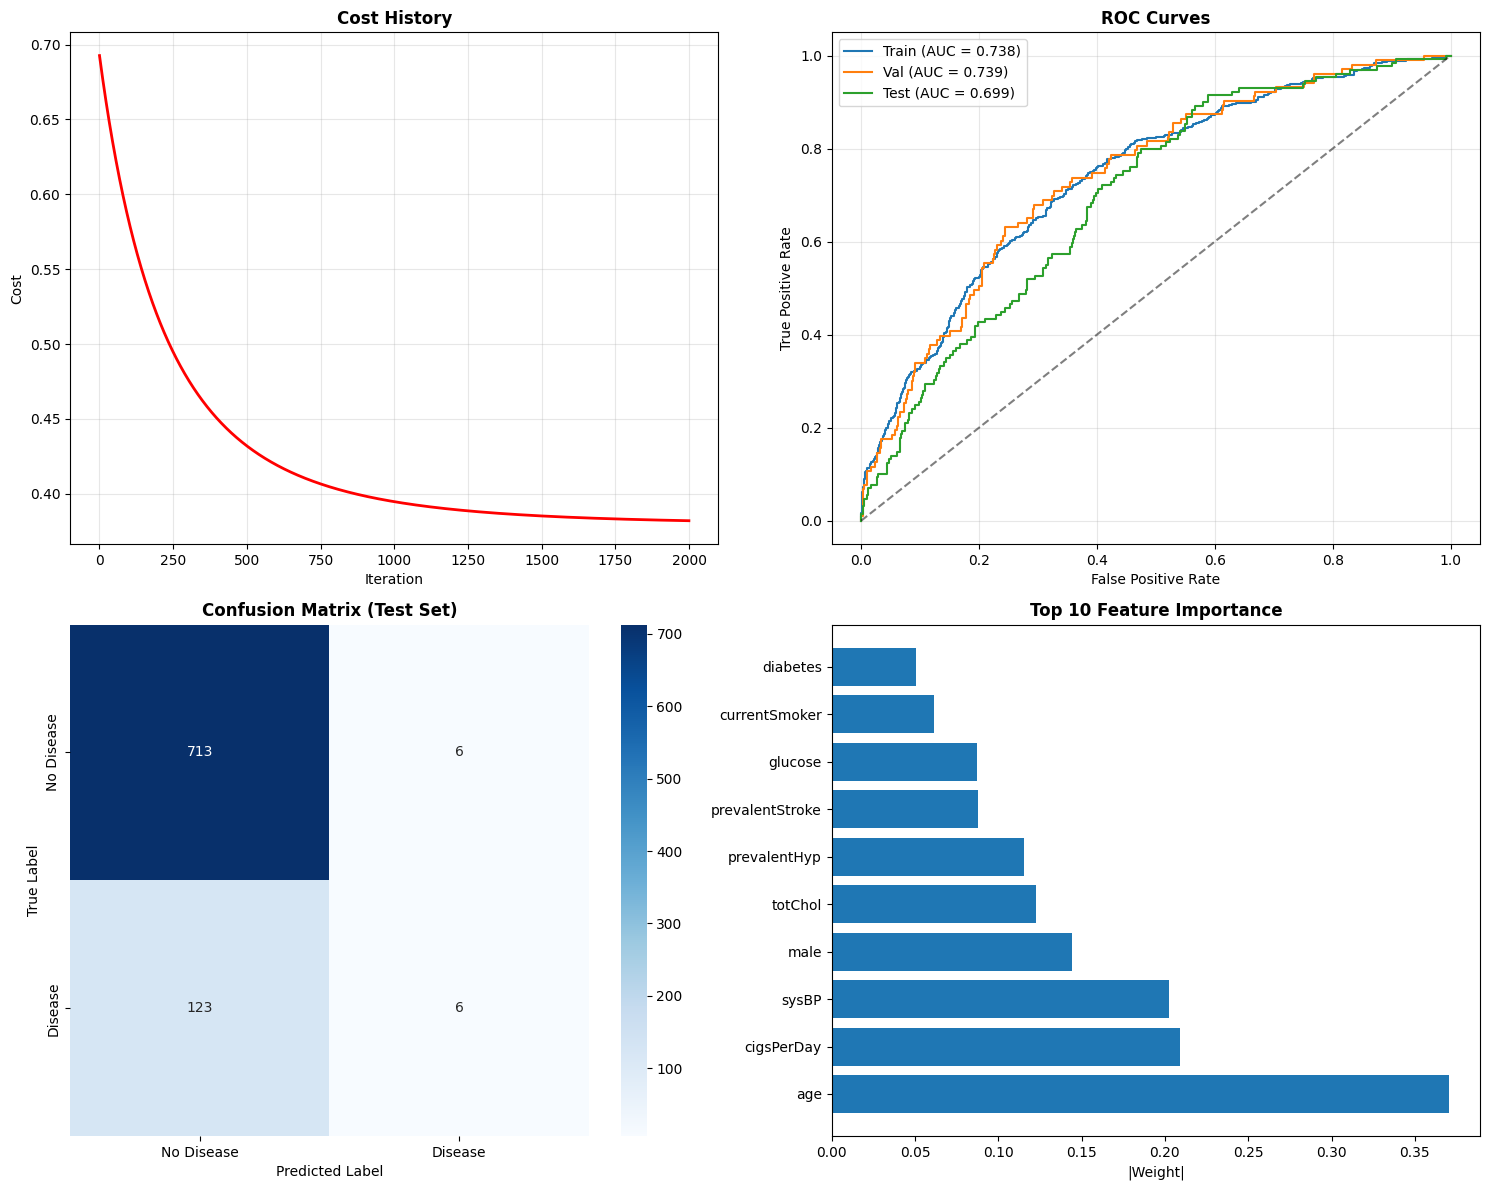


=== Model Summary ===
Total parameters: 16
Converged at iteration: None
Final cost: 0.381964


In [8]:
def main():
    """
    Main execution function
    """
    print("=== Enhanced Heart Disease Prediction ===")
    
    # Configuration
    config = {
        'file_path': r"D:\wids '23\Winter-Projects-of-Machine-Learning\framingham.csv",
        'model_params': {
            'learning_rate': 0.01,
            'max_iterations': 2000,
            'regularization': 'l2',
            'lambda_reg': 0.01,
            'tolerance': 1e-6
        }
    }
    
    # Initialize predictor
    predictor = HeartDiseasePredictor(config['model_params'])
    
    # Load and preprocess data
    X, y = predictor.load_and_preprocess_data(config['file_path'])
    if X is None:
        return
    
    # Cross-validation
    print("\n=== Cross-Validation ===")
    cv_scores = predictor.cross_validate(X, y)
    
    # Train final model
    print("\n=== Training Final Model ===")
    model = predictor.train_model(X, y)
    
    # Evaluate model
    print("\n=== Model Evaluation ===")
    metrics = predictor.evaluate_model()
    
    # Plot results
    print("\n=== Visualization ===")
    predictor.plot_evaluation_metrics()
    
    # Model summary
    print(f"\n=== Model Summary ===")
    print(f"Total parameters: {len(model.weights) + 1}")
    print(f"Converged at iteration: {model.convergence_iteration}")
    print(f"Final cost: {model.cost_history[-1]:.6f}")
    
    return predictor, metrics

if __name__ == "__main__":
    predictor, results = main()